# **Dataset 2 - Gold Price - EDA and Data Preparation**

**Description**
The Gold Price Prediction dataset provides historical financial
data, including daily prices of various financial instruments such as stocks, com-
modities, and indices. It spans from 2010 to 2024, comprising approximately
3904 data samples. Each data sample includes features such as opening and
closing prices, highest and lowest prices of the day, trading volume, and other
relevant financial indicators. The time-series nature of this data allows for
in-depth analysis of trends and patterns over time, making it suitable for fore-
casting future prices or returns.

**Source**
https://www.kaggle.com/datasets/franciscogcc/financial-data/data

**Machine Learning Task**
Regression

**Motivation**
It is fascinating to observe correlations between major indices
like the S&P 500 and Nasdaq, as well as the behavior of individual stocks. This
dataset provides an opportunity to explore financial market trends and predic-
tions.

**Objective**
Utilize historical financial data to predict future prices or returns
of specific financial instruments, aiding in investment decisions and risk man-
agement.

The two machine learning models that will be used in this regression task are Polynomial Regression and Linear Regression (both regularized).

In [33]:
# Imports
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex
import seaborn as sns
import nltk
from collections import defaultdict, Counter
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
import time
from sklearn.preprocessing import PolynomialFeatures


# Brief Exploration of the Dataset

In this section, Exploratory Data Analysis (EDA) is performed on the dataset to gain insight into the context, dimensionality, and common patterns in the data that will be handled and noted for pre-processing and future work.

In [34]:
df = pd.read_csv("financial_regression.csv")
df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


In [35]:
# Exploring the shape and information
print(f"This dataset has {df.shape[0]} data samples and {df.shape[1]} features.")

This dataset has 3904 data samples and 47 features.


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3904 non-null   object 
 1   sp500 open          3719 non-null   float64
 2   sp500 high          3719 non-null   float64
 3   sp500 low           3719 non-null   float64
 4   sp500 close         3719 non-null   float64
 5   sp500 volume        3719 non-null   float64
 6   sp500 high-low      3719 non-null   float64
 7   nasdaq open         3719 non-null   float64
 8   nasdaq high         3719 non-null   float64
 9   nasdaq low          3719 non-null   float64
 10  nasdaq close        3719 non-null   float64
 11  nasdaq volume       3719 non-null   float64
 12  nasdaq high-low     3719 non-null   float64
 13  us_rates_%          176 non-null    float64
 14  CPI                 176 non-null    float64
 15  usd_chf             3694 non-null   float64
 16  eur_us

In [37]:
# Check how many null values for each column
df.isnull().sum()

date                     0
sp500 open             185
sp500 high             185
sp500 low              185
sp500 close            185
sp500 volume           185
sp500 high-low         185
nasdaq open            185
nasdaq high            185
nasdaq low             185
nasdaq close           185
nasdaq volume          185
nasdaq high-low        185
us_rates_%            3728
CPI                   3728
usd_chf                210
eur_usd                210
GDP                   3847
silver open            185
silver high            185
silver low             185
silver close           185
silver volume          185
silver high-low        185
oil open               185
oil high               185
oil low                185
oil close              185
oil volume             185
oil high-low           185
platinum open          185
platinum high          185
platinum low           185
platinum close         185
platinum volume        185
platinum high-low      185
palladium open         185
p

As can be seen above, there are indeed a lot of null values in some of the columns, which will need to be accounted for.

Next, recall that this financial data is time-series data. This inherently means there is most likely a temporal nature to the financial data behind the various currencies/market indices over time, so this will be explored in the following exercise.

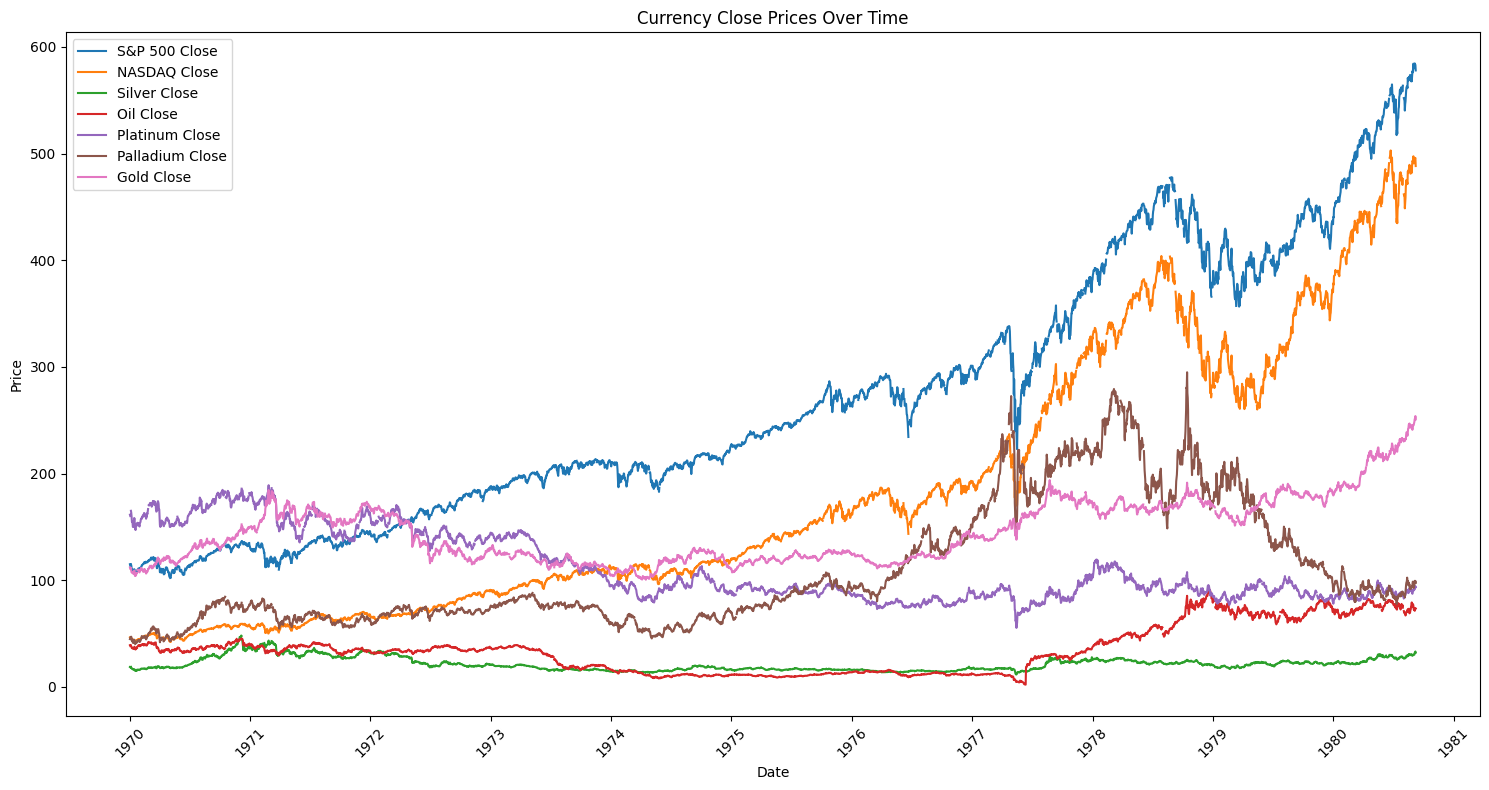

In [38]:
import matplotlib.dates as mdates

# Plot all closes over time
plt.figure(figsize=(15, 8))
plt.plot(df['date'].values, df['sp500 close'].values, label='S&P 500 Close')
plt.plot(df['date'].values, df['nasdaq close'].values, label='NASDAQ Close')
plt.plot(df['date'].values, df['silver close'].values, label='Silver Close')
plt.plot(df['date'].values, df['oil close'].values, label='Oil Close')
plt.plot(df['date'].values, df['platinum close'].values, label='Platinum Close')
plt.plot(df['date'].values, df['palladium close'].values, label='Palladium Close')
plt.plot(df['date'].values, df['gold close'].values, label='Gold Close')
plt.title("Currency Close Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Indeed, there seems to be well-defined temporal trends in the close prices of the various currencies and market indices. The Silver close price seems to stay nearly constant over the time range of this dataset. The Oil close price seems to be constant or slightly decreasing until between 1977 and 1978, upon which it began increasing before leveling off around 1979. The Platinum close price seems to have decreased from 1970 to 1975 and then leveled off until 1981. The Palladium close price seems to have been level until 1976, from which it peaked around 1978 before decreasing back down to the same price around 1980. The Gold close price seems to fluctuate between a price of 200 and 100 over the years before a slight increase around 1978.

The more interesting close prices seem to be the NASDAQ Close and the S&P 500 Close. The NASDAQ close seems to keep increasing from a price of around 50 in 1970 to a price local maxima of 400 around 1979, before decreasing to a local minima, and then has been increasing until 1981. This is a similar pattern with the S&P 500 Close, although it's local maxima peak in 1979 was higher (around a price of 500).

Another interesting temporal pattern is that the Palladium Close, NASDAQ Close, and S&P 500 close all seem to share the same temporal trends over the years (slowly increasing, then rapidly peaking, going down, and then the NASDAQ and S&P 500 close increase while the Palladium close decreases) for the most part. Nonetheless, the S&P 500 over the years past 1972 seems to be the upper bound price, followed by the NASDAQ Close.

For now, it can be noted that the S&P 500 exhibits the most interesting temporal patterns and will be of interest in terms of predicting its Close prices for this task.

There are also a lot of different variables at play in the dataset. However, a lot of the variables are associated with the same market indices (e.g., sp500 open, sp500 high, sp500 low, sp500 close, sp500 volume, sp500 high-low, etc.). This means one would naturally suspect for them to have very high correlation. In the exercise below, the correlations between all the variables is plotted on a heatmap to help visualize any outstanding relations that could be of use in the feature selection and engineering steps later on.

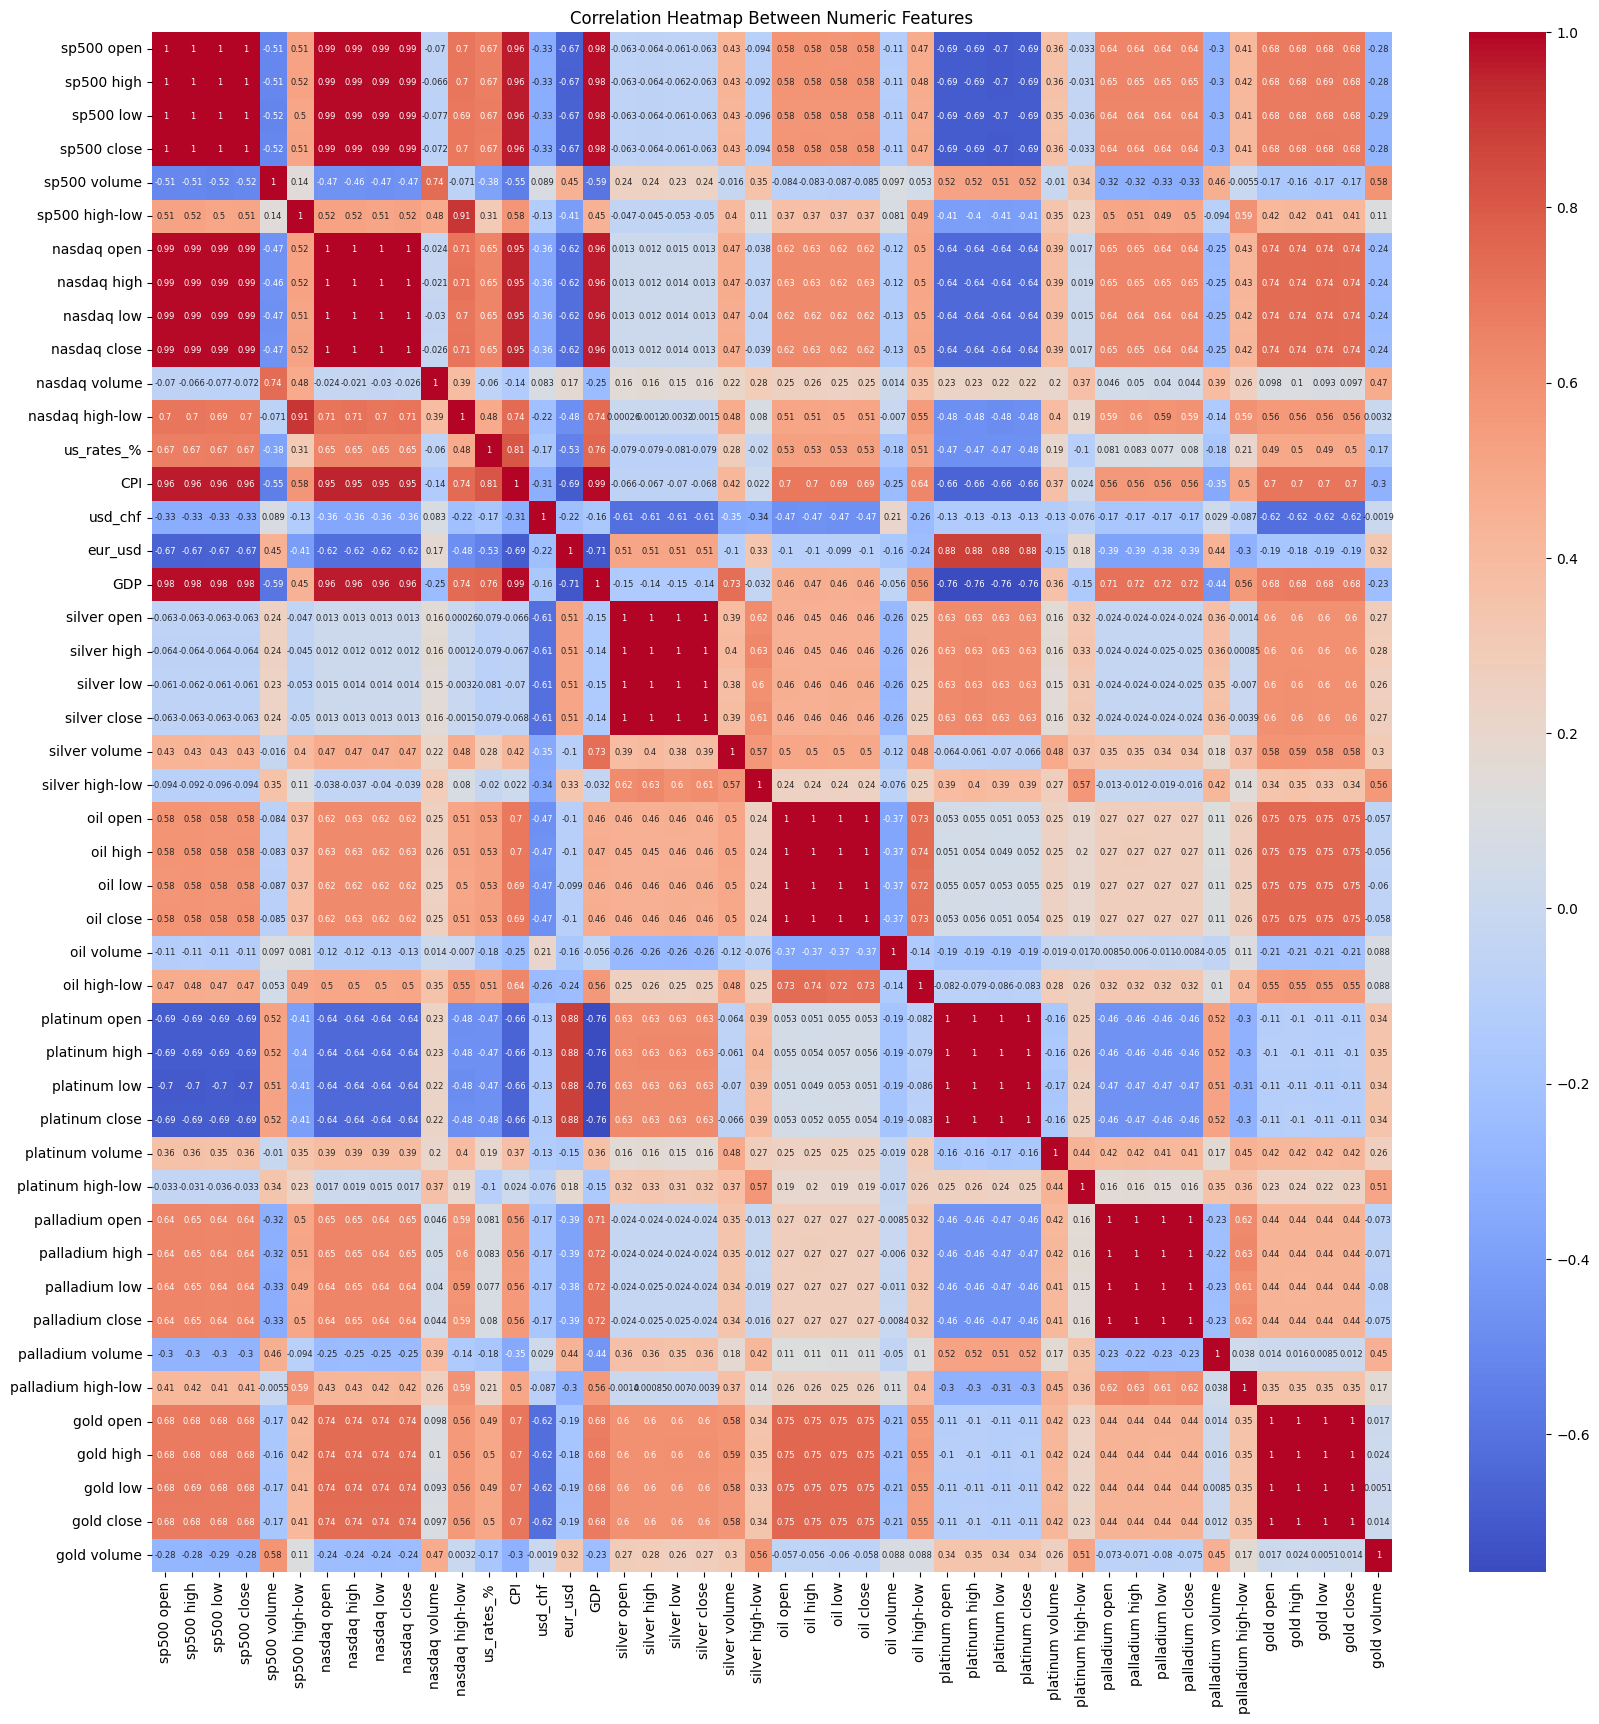

In [39]:
# Correlations
plt.figure(figsize=(20,20))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, annot_kws={'size': 6}, cmap='coolwarm')
plt.title("Correlation Heatmap Between Numeric Features")
plt.show()

As expected, the correlations between variables associated with the different aspects of the price for each market index have perfect correlations of 1. More importantly, however, the S&P 500 Close price seems to be the most of interest. It is interesting to note how the S&P 500 prices have very high positive correlations with the NASDAQ prices, as well as CPI and the GDP, which makes sense because both are correlated and tied with the Consumer Price Index (CPI is a measure of average change over time in prices that consumers pay for a set of goods/services) and the Grodd Domestic Product (GDP measures the market value of all final goods/services produced in the time). Also, interestingly, there is a heavy negative correlation between the platinum prices and the S&P 500. There is medium positive correlation between the S&P 500 and the gold and palladium prices as well. It seems like the S&P 500 prices, and of particular interest the close prices, are correlated with a lot of the other variables, and de-correlation may be required in the feature selection and engineering process.

# Pre-Processing of the Dataset

In this section, the dataset is preprocessed, which is guided by the previous section of exploration of the dataset as well as forthcoming plans for the dataset.

Recall from before that a major issue with the dataset is all of the missing values in the columns/rows. In the below cell, this is handled using the ffill() method. Since there are different granularities of the data source (daily, monthly, quarterly, etc.) or incomplete records, forward filling (ffill()) allows for filling in the missing values in a column with the most recent valid values before the gap, which is reasonable conidering the data is collected as time-series in nature. This allows for continuity in the data, where the previous value is typically a reasonable estimate for the next missing value in such sequential financial data. This allows for maintaining temporal consistencies and maintaining real-world relevance with the financial data.

In [40]:
# Different granularity in time + missing rows -> fill in missing values with most recent previous (ffill)
df = df.ffill()
df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


Note the differences of the data now from before; there are no more NaN values for the various prices, as they were forward filled with the previous most valid price value.

Another important data pre-processing technique is that some columns had missing values early on in the dataset (the early rows/data samples in terms of the time/dates). The ffil() method can't fill these in since there are no previous valid values in time to fill them in, so such rows are simply removed as guessing the interest rates before the first available interest rate is simply not feasible.

In [41]:
# Columns had missing values and ffill can't fill them in, so remove such rows as guessing interest rates before first available interest rate is not feasible.
df = df[~df.isna().any(axis=1)]

# Reset the index
df = df.reset_index(drop=True)

df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-04-01,117.80,118.25,117.10,117.80,161083608.0,1.15,48.34,48.70,47.79,...,49.32,48.7730,48.92,135299.0,0.5470,109.97,110.4700,109.92,110.26,11370417.0
1,2010-04-02,117.80,118.25,117.10,117.80,161083608.0,1.15,48.34,48.70,47.79,...,49.32,48.7730,48.92,135299.0,0.5470,109.97,110.4700,109.92,110.26,11370417.0
2,2010-04-05,118.25,118.84,117.92,118.76,105621743.0,0.92,48.26,48.72,48.14,...,50.98,49.1100,50.38,191249.0,1.8700,110.56,110.9837,110.27,110.89,8207564.0
3,2010-04-06,118.42,119.25,118.29,119.04,110194919.0,0.96,48.49,48.90,48.39,...,51.10,50.3101,50.81,226947.0,0.7899,110.89,111.5100,110.83,111.03,10321993.0
4,2010-04-07,118.80,119.36,117.81,118.36,184432309.0,1.55,48.69,48.87,48.37,...,51.23,50.5101,50.89,483783.0,0.7199,111.85,112.9300,111.77,112.49,19127617.0


As a final step of the pre-processing step, to ensure proper formatting, the pd.to_datetime() method is applied on the 'date' column of the dataset to ensure consistent date and time format of the data for every data sample.

In [42]:
# Need to convert dates to standardized format
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-04-01,117.80,118.25,117.10,117.80,161083608.0,1.15,48.34,48.70,47.79,...,49.32,48.7730,48.92,135299.0,0.5470,109.97,110.4700,109.92,110.26,11370417.0
1,2010-04-02,117.80,118.25,117.10,117.80,161083608.0,1.15,48.34,48.70,47.79,...,49.32,48.7730,48.92,135299.0,0.5470,109.97,110.4700,109.92,110.26,11370417.0
2,2010-04-05,118.25,118.84,117.92,118.76,105621743.0,0.92,48.26,48.72,48.14,...,50.98,49.1100,50.38,191249.0,1.8700,110.56,110.9837,110.27,110.89,8207564.0
3,2010-04-06,118.42,119.25,118.29,119.04,110194919.0,0.96,48.49,48.90,48.39,...,51.10,50.3101,50.81,226947.0,0.7899,110.89,111.5100,110.83,111.03,10321993.0
4,2010-04-07,118.80,119.36,117.81,118.36,184432309.0,1.55,48.69,48.87,48.37,...,51.23,50.5101,50.89,483783.0,0.7199,111.85,112.9300,111.77,112.49,19127617.0


Observe that all the dates are now consistent.

As a final step, observe the final pre-processed data:

In [43]:
df.describe()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
count,3849,3849.000000,3849.000000,3849.000000,3849.000000,3.849000e+03,3849.000000,3849.000000,3849.000000,3849.000000,...,3849.000000,3849.000000,3849.000000,3.849000e+03,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3.849000e+03
mean,2017-07-11 14:59:23.522992896,270.918475,272.369452,269.341146,270.968896,1.108788e+08,3.028305,183.255692,184.555972,181.834671,...,111.110800,108.848156,109.991656,6.894703e+04,2.262644,145.955102,146.600599,145.266843,145.956649,9.514310e+06
min,2010-04-01 00:00:00,103.110000,103.420000,101.130000,102.200000,2.027001e+07,0.300000,42.670000,42.821500,41.550000,...,42.920000,40.700000,41.860000,3.157000e+03,0.230000,100.920000,100.990000,100.232600,100.500000,1.436508e+06
25%,2013-11-21 00:00:00,177.580000,178.660000,176.920000,178.110000,6.642623e+07,1.280000,83.800000,84.020000,83.280000,...,70.000000,69.020000,69.500000,2.065800e+04,0.870000,120.880000,121.340000,120.440000,120.860000,5.756153e+06
50%,2017-07-11 00:00:00,243.130000,244.300000,242.230000,243.290000,9.176631e+07,2.100000,141.800000,142.410000,140.980000,...,85.000000,83.590000,84.250000,3.764400e+04,1.420000,138.440000,139.150000,137.800000,138.620000,7.993280e+06
75%,2021-03-02 00:00:00,376.560000,379.860000,372.890000,376.700000,1.349688e+08,3.820000,285.860000,288.930000,282.730000,...,145.675000,142.290000,144.252000,8.049100e+04,2.720000,168.020000,168.690000,167.210000,168.030000,1.134715e+07
max,2024-10-23 00:00:00,585.910000,586.120000,582.580000,584.590000,7.095045e+08,22.960000,503.070000,503.520000,498.390000,...,298.210000,277.000100,295.000000,1.199042e+06,45.392300,253.080000,253.940000,252.520000,253.930000,9.369811e+07
std,NaN,120.704068,121.350754,119.996930,120.731340,6.761398e+07,2.658756,122.189654,123.106218,121.161133,...,58.323013,56.749438,57.563495,9.457139e+04,2.545303,29.452205,29.603333,29.264259,29.455924,6.083289e+06


# Feature Extraction/Feature Learning from the Dataset


This section involves feature engineering/learning for this dataset, with the main focus of transforming the time series data into sequential time steps starting from 0.

Although the code below looks minimal, it is extremely significant for the task at hand. Since the goal is to eventually predict the S&P 500 closing prices using the time series financial data, feature engineer can play a critical role in transforming the raw data into meaningful input for the machine learning models.

Creation of the 'time_step' feature assigns a sequential numeric value to each date in the dataset, which helps numerically represent the temporal nature of the time series data. When forecasting using time series data, the chronological ordering of the data points is critical to ensure the models' training and predictions are meaningful, since it captures the trends and patterns of the market behavior over time (reference the trends of different currencies over time in the EDA section). In some way, this feature behaves as a proxy for the temporal nature of the data and provides the model a new feature that can help "de-trend" and normalize the data's temporal patterns, especially in the context of the S&P 500 closing prices.

This feature engineering practice also allows for an initially simple representation of the data's temporal patterns without any noise or relationships/influences from other variables in the dataset and feature space. This also ensures that the predictions of future prices are now informed by their historical context in the realm of time as well.

It is also possible that such feature engineering can allow for more interpretable models, especially for financial forecasting, since the model can learn a trend based on the 'time_step' feature to provide the machine learning engineers and users insight into how the S&P 500 prices vary with time.

This can also serve as a baseline for future and more advanced models, allowing for new features such as technical indicators and macroeconomic factors or even lagging time values.

In [44]:
df['time_step'] = np.arange(len(df))  # Sequential time steps starting from 0
X = df[['time_step']].values  # Feature: time step
y = df['sp500 close'].values  # Target: current day close


# Processing of the Dataset Using Two Different Machine Learning Methods

In this section, the declared task of predicting S&P 500 Closing Prices is carried out using two different machine learning methods: Linear Elastic Net Regression and Polynomial Elastic Net Regression.

The final results are presented at the end of this section.

Intercept (β0): 84.97802526419241
Slope (β1): 0.091615072151674

Train Mean Squared Error (MSE): 654.512631842974
Test Mean Squared Error (MSE): 4334.020153924629


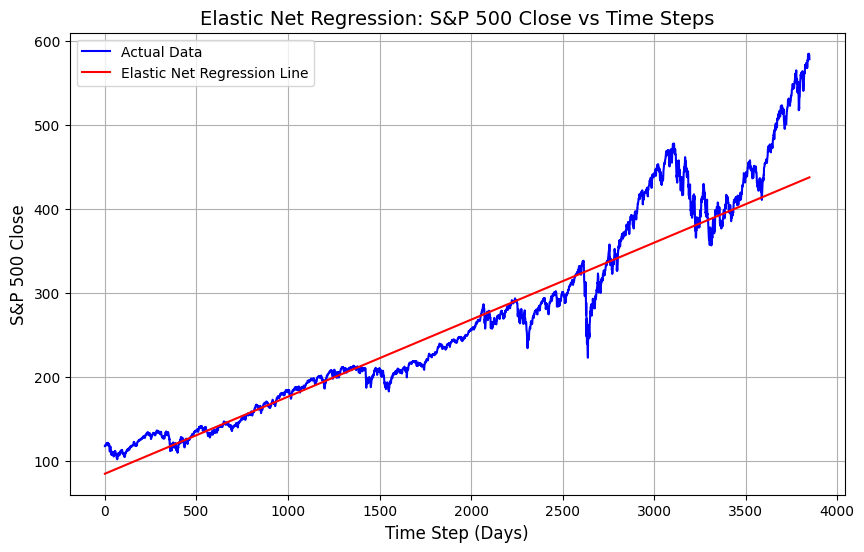

In [45]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

# Train-test split (80% train, 20% test)
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Elastic Net Regression
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42) 
elastic_net.fit(X_train, y_train)

# Coefficients
beta_0 = elastic_net.intercept_  # Intercept
beta_1 = elastic_net.coef_[0]    # Slope
print("Intercept (β0):", beta_0)
print("Slope (β1):", beta_1)

# Predictions
y_train_pred = elastic_net.predict(X_train)
y_test_pred = elastic_net.predict(X_test)
y_pred_full = elastic_net.predict(X)  # Predict for the entire dataset for plotting

# Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("\nTrain Mean Squared Error (MSE):", train_mse)
print("Test Mean Squared Error (MSE):", test_mse)

# Plotting
plt.figure(figsize=(10, 6))

# Actual data
plt.plot(df['time_step'], y, color='blue', label='Actual Data')

# Regression line for the entire dataset
plt.plot(df['time_step'], y_pred_full, color='red', label='Elastic Net Regression Line')

# Labels and title
plt.title('Elastic Net Regression: S&P 500 Close vs Time Steps', fontsize=14)
plt.xlabel('Time Step (Days)', fontsize=12)
plt.ylabel('S&P 500 Close', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


# Elastic Net Regression on S&P 500 Close Prices

This script performs a regression analysis using the **Elastic Net** algorithm from sci-kit learn (https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.ElasticNet.html) to model the relationship between time steps and the S&P 500's closing prices. Here's a breakdown of the script and the underlying mechanics:

## Steps in the Script:

1. **Train-Test Split:**
   - The data is split into a training set (80%) and a test set (20%) to evaluate the model's performance on unseen data.

2. **Elastic Net Regression:**
   - The Elastic Net algorithm is instantiated with:
     - `alpha=1.0`: The regularization strength.
     - `l1_ratio=0.5`: A mix of L1 (Lasso) and L2 (Ridge) penalties.
     - `random_state=42`: Ensures reproducibility.

   - The model learns the best-fit regression line by minimizing the regularized mean squared error (MSE) during training.

3. **Model Coefficients:**
   - The intercept ($\beta_0$) and slope ($\beta_1$) of the regression line are extracted:
     - **Intercept ($\beta_0$):** 84.97802526419241
     - **Slope ($\beta_1$):** 0.091615072151674

4. **Performance Evaluation:**
   - The model makes predictions for both training and test datasets.
   - The **Mean Squared Error (MSE)** is calculated to evaluate prediction accuracy:
     - **Train MSE:** 654.512631842974
     - **Test MSE:** 4334.020153924629

5. **Visualization:**
   - The actual S&P 500 closing prices are plotted alongside the regression line predicted by Elastic Net.

---

## What Elastic Net Does Under the Hood:

Elastic Net combines the properties of **Lasso (L1)** and **Ridge (L2)** regularization methods:
- **L1 Regularization (Lasso):**
  - Encourages sparsity by shrinking some coefficients to exactly zero. This is useful for feature selection when dealing with many predictors.
- **L2 Regularization (Ridge):**
  - Shrinks coefficients smoothly, reducing multicollinearity (correlation among predictors).

By blending these two methods using the `l1_ratio` parameter:
- A ratio closer to 1 emphasizes L1 regularization (sparser solutions).
- A ratio closer to 0 emphasizes L2 regularization (more robust solutions).

Elastic Net's combination of penalties makes it effective in handling:
- Datasets with correlated predictors.
- Situations where some features are irrelevant and others contribute weakly.

---

## Results and Interpretation:

- **Intercept ($β_0$):** 84.97802526419241, representing the baseline S&P 500 closing price when the time step is 0.
- **Slope ($β_1$):** 0.091615072151674, indicating the rate of change in the S&P 500 closing price for each time step.

### Key Metrics:
- **Train MSE:** 654.512631842974, suggesting the model fits the training data reasonably well.
- **Test MSE:** 4334.020153924629, indicating the model's generalization performance on unseen data is less accurate.

---

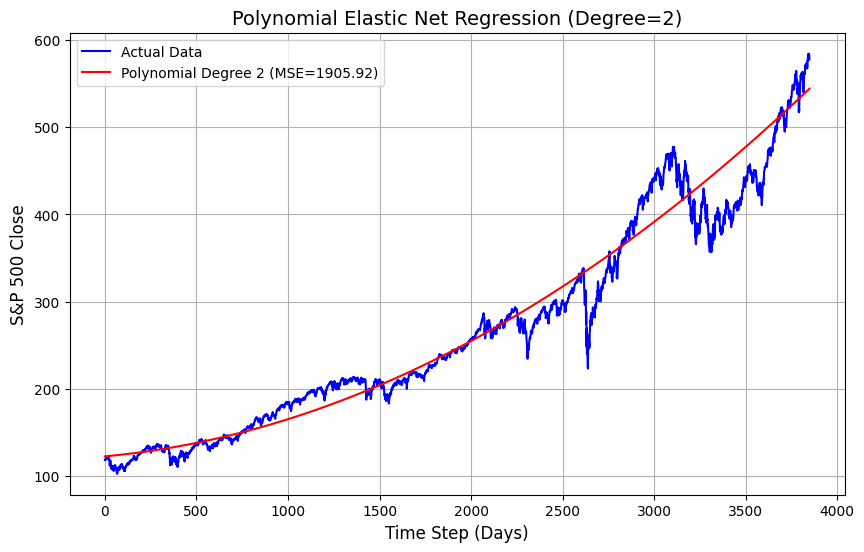

c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.961e+05, tolerance: 2.243e+03
  model = cd_fast.enet_coordinate_descent(


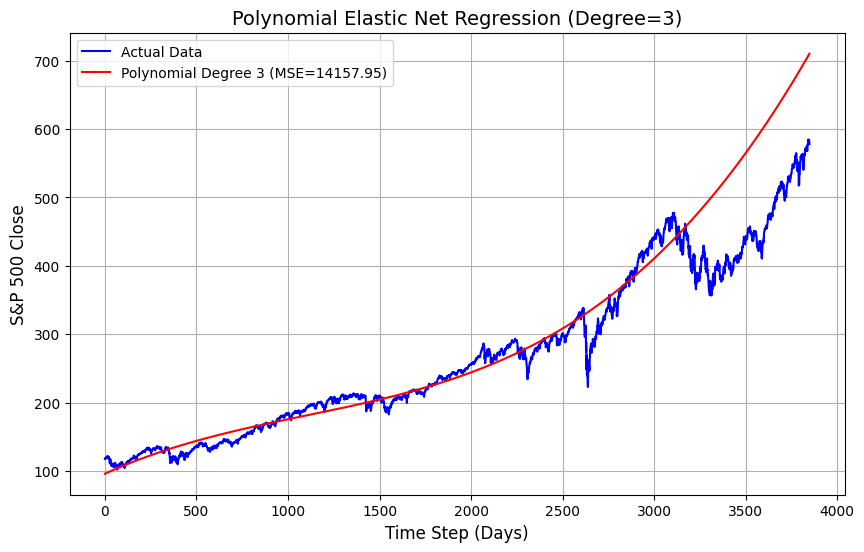

c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.488e+05, tolerance: 2.243e+03
  model = cd_fast.enet_coordinate_descent(


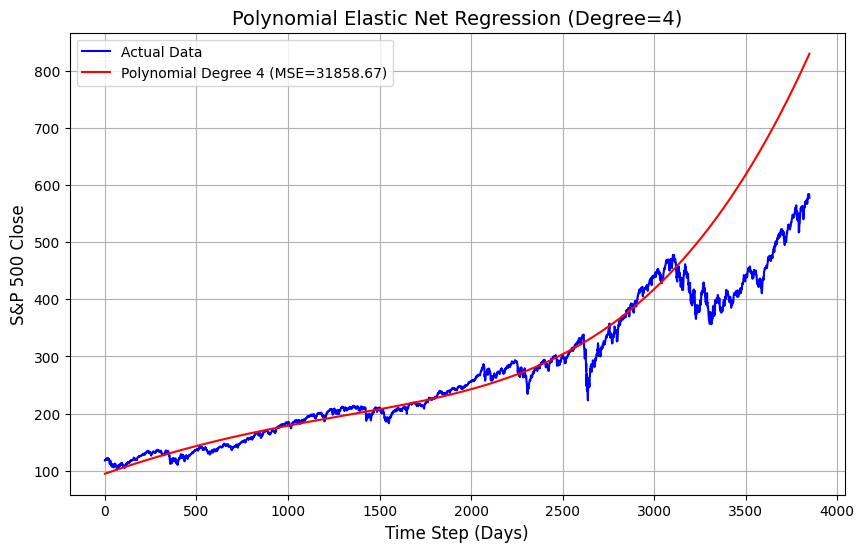

c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.041e+05, tolerance: 2.243e+03
  model = cd_fast.enet_coordinate_descent(


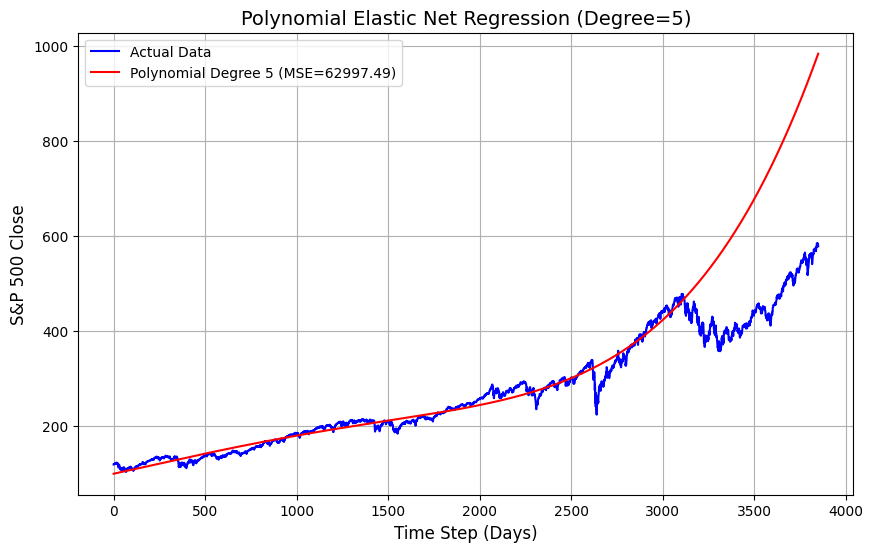

c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.710e+05, tolerance: 2.243e+03
  model = cd_fast.enet_coordinate_descent(


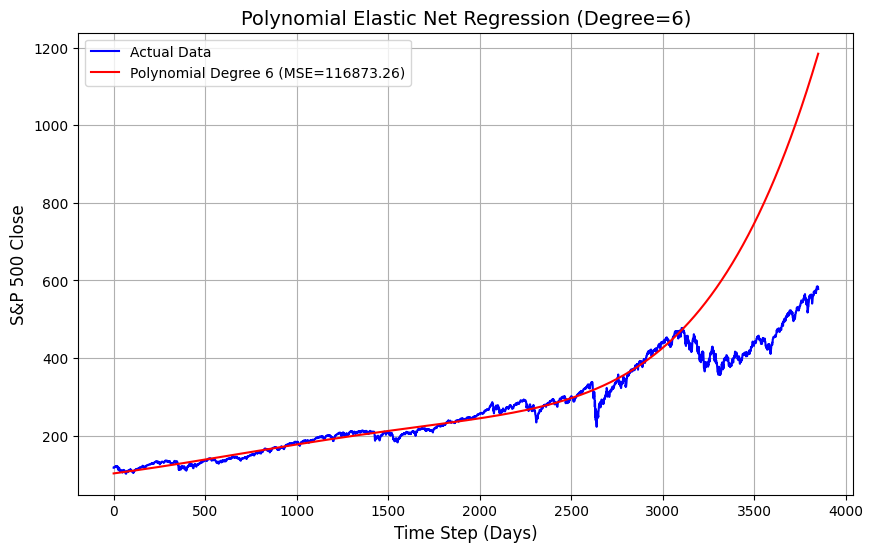

c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.526e+05, tolerance: 2.243e+03
  model = cd_fast.enet_coordinate_descent(


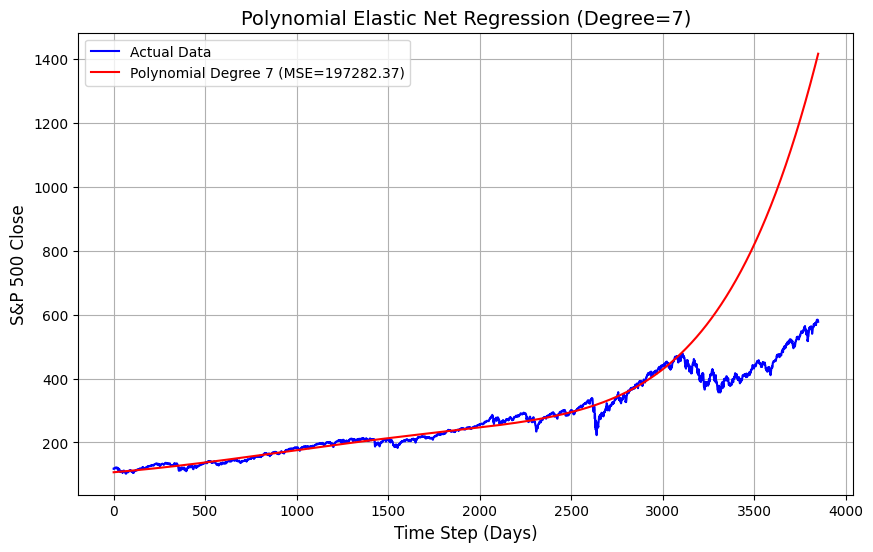

c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.442e+05, tolerance: 2.243e+03
  model = cd_fast.enet_coordinate_descent(


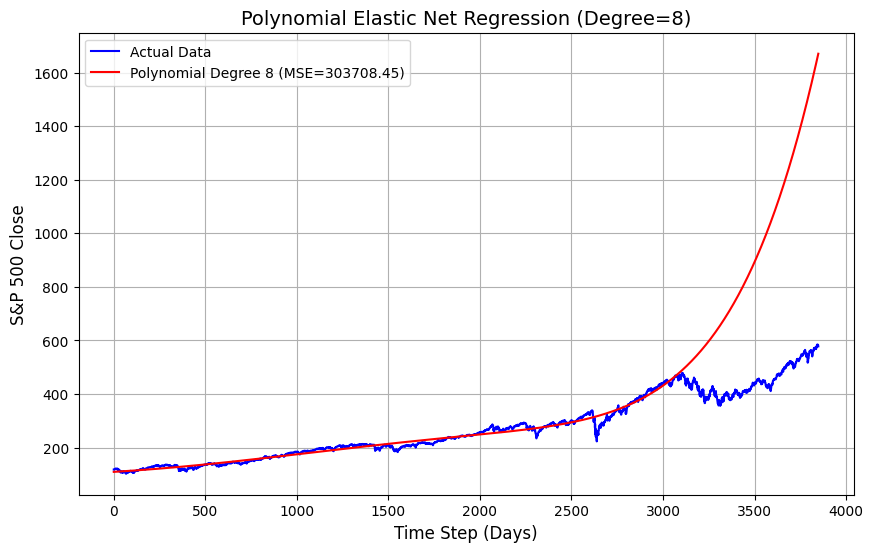

c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.407e+05, tolerance: 2.243e+03
  model = cd_fast.enet_coordinate_descent(


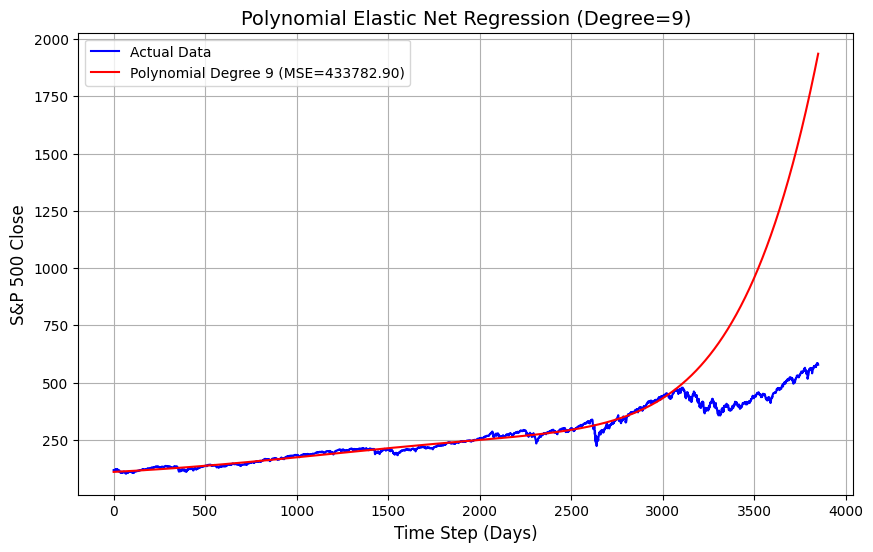

c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.391e+05, tolerance: 2.243e+03
  model = cd_fast.enet_coordinate_descent(


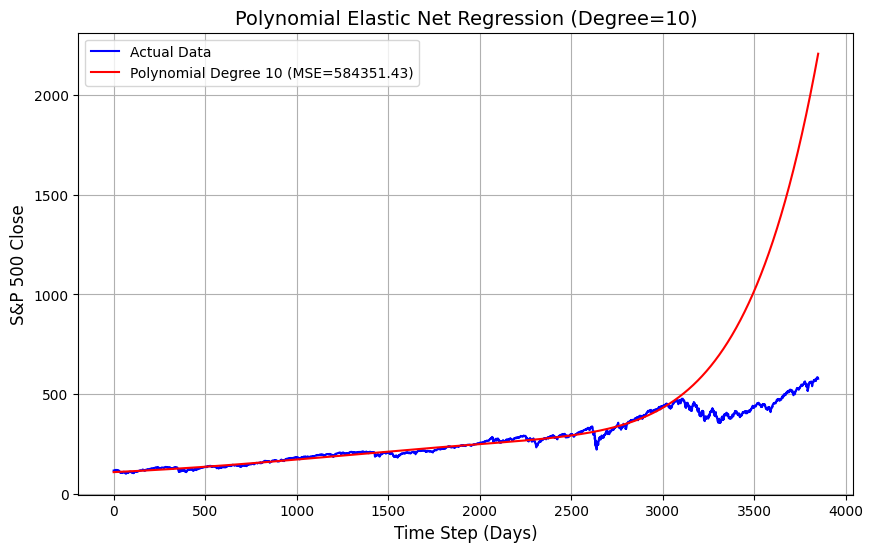


Best Polynomial Degree: 2
Lowest MSE: 1905.92


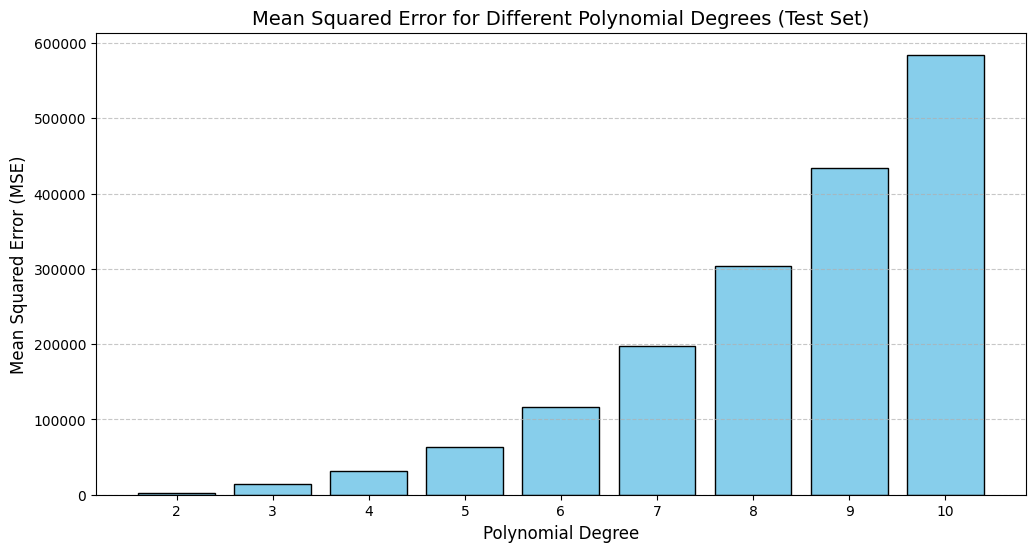

In [46]:
# Initialize variables to track the best model
best_degree = None
lowest_mse = float('inf')

# Dictionary to store MSE for each degree
mse_results = {}

# Iterate through polynomial degrees
for degree in range(2, 11):
    # Polynomial Features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_poly = poly.transform(X)  # Transform the entire dataset for plotting

    # Elastic Net Regression with polynomial features
    elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)  # Adjust alpha and l1_ratio as needed
    elastic_net.fit(X_train_poly, y_train)

    # Predictions on the test set and entire dataset
    y_test_pred = elastic_net.predict(poly.transform(X_test))
    y_pred = elastic_net.predict(X_poly)

    # Mean Squared Error (MSE) on the test set
    mse = mean_squared_error(y_test, y_test_pred)
    mse_results[degree] = mse

    # Update best degree if current MSE is lower
    if mse < lowest_mse:
        lowest_mse = mse
        best_degree = degree

    # Plotting
    plt.figure(figsize=(10, 6))

    # Actual data (entire dataset)
    plt.plot(df['time_step'], y, color='blue', label='Actual Data')

    # Polynomial regression line (entire dataset)
    plt.plot(df['time_step'], y_pred, color='red', label=f'Polynomial Degree {degree} (MSE={mse:.2f})')

    # Labels and title
    plt.title(f'Polynomial Elastic Net Regression (Degree={degree})', fontsize=14)
    plt.xlabel('Time Step (Days)', fontsize=12)
    plt.ylabel('S&P 500 Close', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Display the best polynomial degree and its MSE
print(f"\nBest Polynomial Degree: {best_degree}")
print(f"Lowest MSE: {lowest_mse:.2f}")

# Bar chart of MSE for each degree
plt.figure(figsize=(12, 6))
plt.bar(mse_results.keys(), mse_results.values(), color='skyblue', edgecolor='black')
plt.title('Mean Squared Error for Different Polynomial Degrees (Test Set)', fontsize=14)
plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.xticks(range(2, 11))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Polynomial Elastic Net Regression with Visualization

This code implements polynomial regression using Elastic Net regularization to model and predict the S&P 500 Close values. It evaluates polynomial degrees from 2 to 10, calculates the Mean Squared Error (MSE) for each degree, and visualizes the results. The best-performing degree is identified based on the lowest MSE.

## Code Description
### 1. Polynomial Feature Expansion
The `PolynomialFeatures` class from `sklearn.preprocessing` is used to expand the input feature set (https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). For a polynomial degree $ d $, this generates all possible combinations of features up to $ d $, including interaction terms. For example:
- For $ x_1 $ and $ x_2 $ with degree=2, the features include $ 1, x_1, x_2, x_1^2, x_2^2, $ and $ x_1x_2 $.
This transformation enables the model to capture non-linear relationships in the data.

However, as the polynomial degree increases, the number of features grows exponentially, making the model more complex and prone to overfitting, especially when the training data is limited.

### 2. Fitting Elastic Net Regression
An Elastic Net regression model is trained for each polynomial degree using the transformed training data. Elastic Net combines Lasso (L1) and Ridge (L2) regularization:
- **L1 Regularization**: Encourages sparsity by setting some coefficients to zero, reducing the complexity of the model.
- **L2 Regularization**: Penalizes large coefficients to improve generalization and stability.
The `alpha` and `l1_ratio` parameters control the strength and balance of these penalties, mitigating overfitting while allowing flexibility.

### 3. Evaluation with MSE
The model's predictions on the test set are compared to the actual values using the Mean Squared Error (MSE) metric. The MSE for each degree is stored, and the degree with the lowest MSE is updated as `best_degree`. 

#### Overfitting and MSE Behavior:
- **Lower Degrees (e.g., 2-3)**: The model underfits, as it may not capture the complexity of the data, leading to higher MSE.
- **Higher Degrees (e.g., 8-10)**: The model overfits, as it tries to match the training data too closely, fitting noise rather than the underlying trend. This results in a drastic increase in MSE on the test set because the model generalizes poorly to unseen data.

### 4. Best Degree and Summary
The best polynomial degree and its MSE are printed to summarize the results. Typically, the best-performing degree lies in the middle range (e.g., 3-5), balancing the complexity of the model and its ability to generalize.

---

## Key Insights
- **Polynomial Features**: Expand the input space to capture non-linear patterns but risk overfitting as the degree increases.
- **Elastic Net Regularization**: Helps mitigate overfitting by penalizing model complexity.
- **Overfitting Behavior**: High-degree polynomials tend to overfit the training data, causing a significant increase in MSE on the test set.
- **Optimal Degree**: Balances underfitting and overfitting, achieving the lowest MSE and good generalization.

Visualizing the results provides critical insights into the trade-offs between model complexity and performance, highlighting the importance of regularization and degree selection in polynomial regression.


# Performance Comparison: Linear vs. Polynomial Regression (Degree 2)

In this analysis, we compare the performance of linear regression and polynomial regression with a degree of 2 on a dataset, using the Mean Squared Error (MSE) on the testing set as the evaluation metric. The results highlight the benefits of polynomial regression in capturing non-linear patterns and achieving lower error rates.

---

## Mean Squared Error (MSE) on the Testing Set

- **Linear Regression MSE**: 4334.02  
- **Polynomial Regression (Degree 2) MSE**: 1905.92  

### Key Observations:
1. **Linear Regression**:
   - The higher MSE of **4334.02** indicates that the model struggled to capture the non-linear relationships in the data.
   - This is expected as linear regression fits a straight line, which cannot adapt to curvature or complex patterns in the dataset.

2. **Polynomial Regression (Degree 2)**:
   - The significantly lower MSE of **1905.92** demonstrates the model's ability to capture non-linear trends through the inclusion of quadratic terms.
   - The reduced error indicates better predictions on unseen data compared to the linear model.

---

## Analysis of Results

### 1. **Improved Fit**
- Polynomial regression achieved a nearly **56% reduction in MSE** compared to linear regression, highlighting its superiority in modeling datasets with non-linear trends.

### 2. **Feature Expansion**
- The transformation to polynomial features added quadratic terms (e.g., \( x^2 \)), allowing the model to account for curvature in the data, which linear regression cannot represent.

### 3. **Generalization**
- Despite the improved fit, the degree-2 polynomial regression avoids the overfitting commonly seen in higher-degree models, ensuring good generalization on the test set.

### 4. **Trade-offs**
- **Linear Regression**: Simpler, faster to train, but poor performance on non-linear datasets.
- **Polynomial Regression (Degree 2)**: Slightly higher computational cost due to feature transformation, but significantly better predictive accuracy.

---

The comparison of MSE values shows that **polynomial regression (degree 2)** outperforms **linear regression** by effectively modeling the underlying non-linear relationships in the dataset. While it requires additional computational effort, the reduction in testing error (from 4334.02 to 1905.92) makes it a clear choice for datasets with non-linear trends. This result highlights the importance of selecting a model complexity that aligns with the nature of the data.


# Discussion on Ethical Issues for the Dataset/Task

This section provides a discussion on the ethical aspects of the machine learning task carried out on this dataset.

## Ethical Considerations for Predicting S&P 500 Closing Prices

### **Privacy Concerns**
The dataset used in this machine learning task primarily consists of financial information, which does not immediately nor directly have personal or sensitive information on specific individuals. Nonetheless, integrating such a dataset with other personal information datasets could lead to privacy breaches.

### **Bias and Fairness**
Biases may be inadvertently embedded into the model due to historical financial data, which can reflect systemic inequalities and other types of behaviors in the market. As an example, consider how the S&P 500 is inherently biased toward large-cap U.S. companies, which can potentially exclude any broader economic ecosystems, thus impacting smaller businesses and/or international markets. Such biases can easily skew predictions on the closing prices which could create unfairness by helping a certain subset of stakeholders.

### **Transparency and Explainability**
Financial forecasting models such as the ones used in this task, especially in the realm of time-series data, can be difficult to understand when interpreting the behavior. It is important to remain transparent over what limitations the models have, what assumptions are made about the data (reference earlier sections of this notebook), what approaches are used, and how the model outputs are used in decision making. If stakeholders are, for instance, using these models, they must understand the uncertainty entangled with the predictions to avoid being overly dependent on the model outputs to make decisions, which can easily become biased and incorrect.

### **Accuracy and Reliability**
Financial forecasting typically requires a high degree of accuracy even in the uncertain nature of the markets; any error can lead to significant financial loss, misguided decisions, or worse. The models should be frequently audited, tuned, and refined over time to ensure they are reliable and adapting to the dynamic and fluctuating nature of today's financial markets. Moreover, domain expertise and increased validation techniques can help mitigate risks such as overfitting on the current training data available (or underfitting).

### **Understanding Context**
There can be a lot of factors and context entangled with the behavior of the financial market (for instance, global events, economic policies, market sentiment, etc.) which the training data the models are trained on may not accurately capture. Failing to capture such patterns and relationships/correlations could cause such external factors and variables to lead to generalizations on the data that are too simplistic to be interpretable and beneficial for market prediction.

### **Accountability and Transparency**
Using machine learning models for financial forecasting, such as the ones used in this task/project, can have huge societal and economic impacts in the future. Predicting market trends, for instance, from these models can easily influence investment strategies, economic planning, trading behaviors, etc. There needs to be a high level of ethical understanding and accountability behind the developers and users of these models. Misusing or misrepresenting such machine learning models can only reinforce bias and volatility in the market's behavior, which in turn can lead to unethical trading, investing, etc.

### **Governance and Compliance with Standards**
There are numerous legal and regulatory frameworks already in place regarding financial forecasting (including from financial authorities including the SEC). The approaches to data usage, creating fair and unbiased models, and being transparent helps protect against any legal and ethical complications that may arise down the road.

### **Mitigating Negative Consequences**
Ethical approaches should be taken in financial forecasting with these machine learning models to address unintended results of the decision making process. This includes reinforcing any inequalities in the market or impacting market manipulation. Human integration and resources from domain expertise are critical in ensuring responsible use is prioritized.

### **Gaining User Trust**
Gaining the trust of users is another ethical consideration when using the models for financial forecasting; fairness should be prioritized, along with transparency, accountability, and accuracy. Any organizations or individuals using these machine learning models should be in full compliance and be held responsible and accountable for positively impacting soceity with the usage. This will help promote user trust and confidence the models.

### **Constantly Innovating, Learning, and Improving**
Frequently auditing the models and their ethical impacts, as well as ensuring proper data collection and validation, are critical procedures in ensuring that the models can generalize with the rapidly evolving market dynamics and ethical standards. In fact, feedback can be used from users and stakeholders for ongoing improvement and ensuring the models and decision making process align with ethical guidelines.

Ultimately, this is a very high level overview of various ethical considerations involved with predicting the S&P 500 Closing prices. One of the most interesting notes is how different the ethical considerations of this task are from the other datasets and tasks in this project; even though, in this task, individuals do not seem to be directly involved with ethical considerations, the indirect impacts of the decision making process using such machine learning models for financial forecasting and market predictions can be severe on individuals. Following the approaches outlined above can help mitigate the reliability, fairness, and use of such models while also enhancing the trust of users and confidence in the models, as well as positively impacting society in an ethical manner.

# Bibliography

1. **Gold Price Regression (Kaggle Dataset)**  
   URL: [https://www.kaggle.com/datasets/franciscogcc/financial-data/data](https://www.kaggle.com/datasets/franciscogcc/financial-data/data)  

1. **scikit-learn ElasticNet Documentation**  
   URL: [https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.ElasticNet.html](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.ElasticNet.html)  

2. **scikit-learn PolynomialFeatures Documentation**  
   URL: [https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.PolynomialFeatures.html](https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)  
